**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


**Load the Dataset**

In [2]:

data = pd.read_csv('/content/Mall_Customers.csv')
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Basic Exploration**

Shape: (200, 5)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


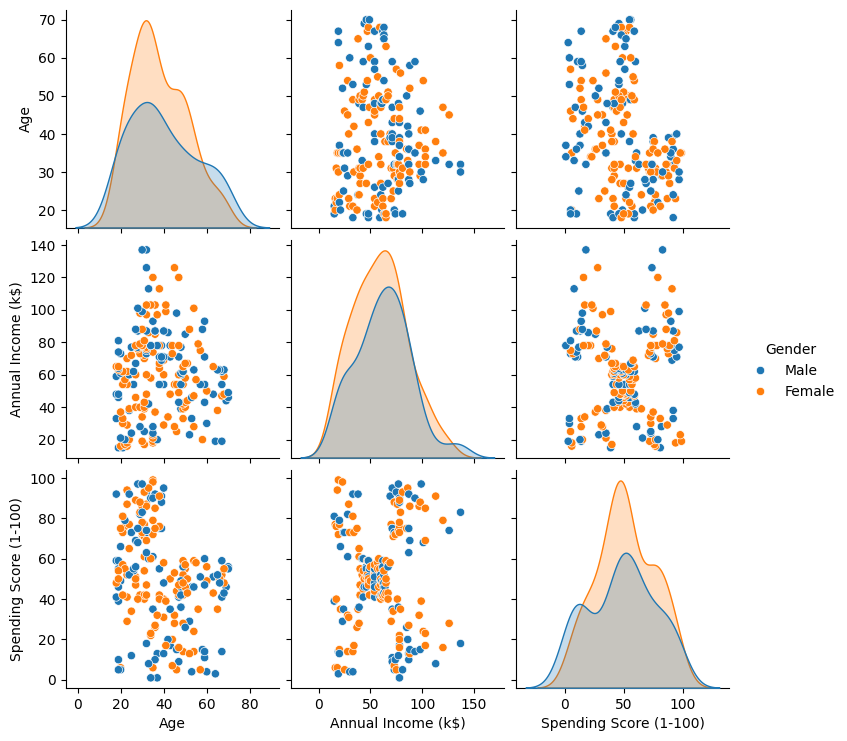

In [3]:
print("Shape:", data.shape)
print("Info:")
print(data.info())

# Optional visual
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender')

**Feature Selection**

In [5]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

**Elbow Method to Find Optimal K**

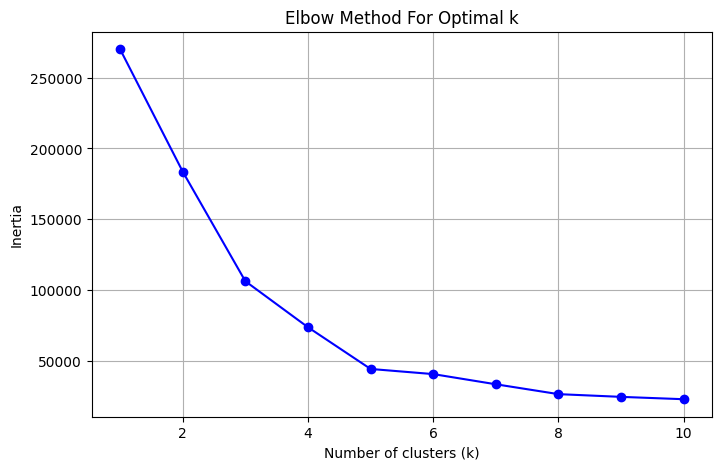

In [6]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

**Fit KMeans with Optimal k**

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)

# Add cluster labels to data
data['Cluster'] = clusters

**Visualize Clusters**

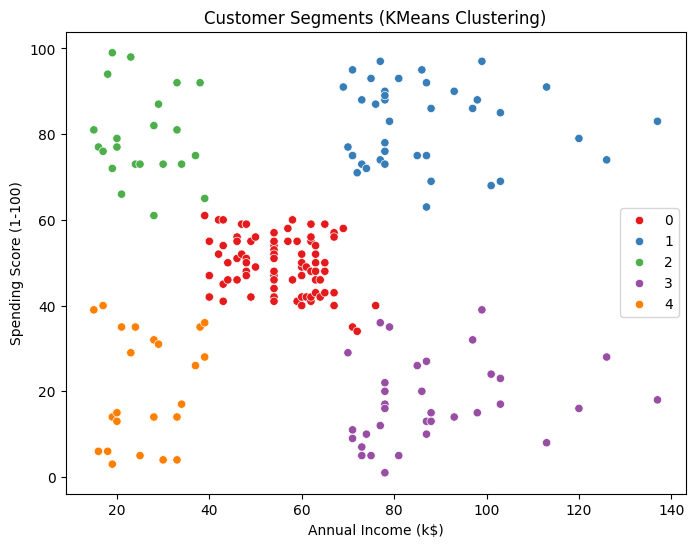

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)', hue=clusters, palette='Set1')
plt.title('Customer Segments (KMeans Clustering)')
plt.show()

**Evaluate Clustering using Silhouette Score**

In [9]:
score = silhouette_score(X, clusters)
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.55


**PCA Visualization (2D Projection)**

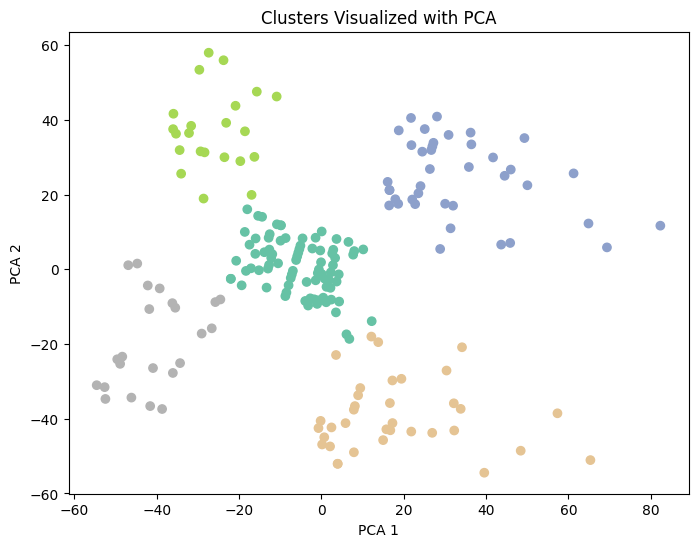

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='Set2')
plt.title('Clusters Visualized with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

**Final Data Overview**

In [11]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
